In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Setting generated plots directly in the notebook
%matplotlib inline

#plot style
sns.set(color_codes = True)

In [2]:
df = pd.read_csv('client_data.csv')

In [3]:
# Converting date columns to datetime objects
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [4]:
df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t       0.0   
1      2009-08-21   2015-08-31             189.95  ...        f       0.0   
2      2010-04-16   2015-04-17              47.96  ...        f       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  

[3 rows x 26 columns]

In [5]:
# Convert date column to datetime object

price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [6]:
# Difference between off-peak prices in December and preceding January

# Group off-peak prices by companies and month

monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices

jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [7]:
# Merging the new data to client dataframe

df = pd.merge(df, diff, on = 'id')
df.head(5)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  margin_gross_pow_ele  \
0      2015-11-01   2015-06-23               0.00  ...                 25.44   
1      2009-08-21   2015-08-31             189.95  ...                 16.38   
2      2010-04-16   2015-04-17              47.96  ...                 28.60   
3      2010-03-30   2015-03-31             240.04  ...                 30.22   
4      2010-01-13   2015-03-09             445.75  ...                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up pow_max  churn  \
0  lxidpiddsbxsbosboudacockeimpuepw  43.648      1   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws  13.800      0   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws  13.856      0   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws  13.200      0   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws  19.800      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                         0.020057                        3.700961  
1                        -0.003767                        0.177779  
2                        -0.004670                        0.177779  
3                        -0.004547                        0.177779  
4                        -0.006192                        0.162916  

[5 rows x 28 columns]

In [8]:
# Calculating average price change per period

# Aggregate average prices per period by company

mean_prices = price_df.groupby(['id']).agg({'price_off_peak_var': 'mean', 'price_peak_var': 'mean','price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean', 'price_peak_fix': 'mean','price_mid_peak_fix': 'mean'}).reset_index()

In [9]:
# Calculate the mean difference between periods

mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [10]:
# Changing the mean difference to columns of mean_prices

columns = ['id','off_peak_peak_var_mean_diff','peak_mid_peak_var_mean_diff','off_peak_mid_peak_var_mean_diff',
           'off_peak_peak_fix_mean_diff','peak_mid_peak_fix_mean_diff','off_peak_mid_peak_fix_mean_diff']

In [11]:
# Merge the new data to client dataframe

df = pd.merge(df, mean_prices[columns], on = 'id')

df.head(5)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  pow_max  churn  \
0      2015-11-01   2015-06-23               0.00  ...   43.648      1   
1      2009-08-21   2015-08-31             189.95  ...   13.800      0   
2      2010-04-16   2015-04-17              47.96  ...   13.856      0   
3      2010-03-30   2015-03-31             240.04  ...   13.200      0   
4      2010-01-13   2015-03-09             445.75  ...   19.800      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0                         0.020057                        3.700961   
1                        -0.003767                        0.177779   
2                        -0.004670                        0.177779   
3                        -0.004547                        0.177779   
4                        -0.006192                        0.162916   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   
2                     0.082090                     0.088421   
3                     0.151210                     0.000000   
4                     0.020536                     0.030773   

  off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                        0.058257                    18.590255   
1                        0.149609                    44.311375   
2                        0.170512                    44.385450   
3                        0.151210                    44.400265   
4                        0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                     7.450670                        26.040925  
1                     0.000000                        44.311375  
2                     0.000000                        44.385450  
3                     0.000000                        44.400265  
4                     8.137629                        24.412893  

[5 rows x 34 columns]

In [12]:
# Checking how long a customer has been with the client in relation to churn

# the result showed customers with active period of 4 months and less are more likely to churn

df['duration'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

df.groupby(['duration']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
duration          
3         0.143713
2         0.133080
4         0.125756
13        0.095238
5         0.085425
12        0.083333
6         0.080713
7         0.073394
11        0.063584
8         0.048000
9         0.024096
10        0.020000

In [13]:
# Checking customers that also bought gas (most likely loyal customers)

# Transform from categorical to binary

df['has_gas'] = df['has_gas'].replace(['t', 'f'],[1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100544
1        0.081856

The result showed customers that also bought both gas and energy are less likely to churn than those that bought only energy

In [14]:
# Transforming categorical data into 1 or 0 for the purpose of predictive model

df['channel_sales'] = df['channel_sales'].astype('category')

df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

The result showed there are 8 categories hence a need to create 8 dummy categories, however the last 3 can be removed since the number of occurence are negligible for a 14000 row dataset

In [15]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 
                      'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  forecast_cons_12m  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23               0.00   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31             189.95   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17              47.96   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31             240.04   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09             445.75   

   forecast_cons_year  ...  off_peak_mid_peak_var_mean_diff  \
0                   0  ...                         0.058257   
1                   0  ...                         0.149609   
2                   0  ...                         0.170512   
3                   0  ...                         0.151210   
4                 526  ...                         0.051309   

   off_peak_peak_fix_mean_diff  peak_mid_peak_fix_mean_diff  \
0                    18.590255                     7.450670   
1                    44.311375                     0.000000   
2                    44.385450                     0.000000   
3                    44.400265                     0.000000   
4                    16.275263                     8.137629   

   off_peak_mid_peak_fix_mean_diff  duration  channel_MISSING  \
0                        26.040925         3                0   
1                        44.311375         7                1   
2                        44.385450         6                0   
3                        44.400265         6                0   
4                        24.412893         6                1   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 39 columns]

In [16]:
# Similar to channel_sales, transform origin_up

df['origin_up'] = df['origin_up'].astype('category')

df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

The last three categories can also be ignored since the value counts are negligible for a 14000 row dataset


In [17]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 
                      'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  forecast_cons_12m  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23               0.00   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31             189.95   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17              47.96   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31             240.04   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09             445.75   

   forecast_cons_year  ...  off_peak_mid_peak_fix_mean_diff  duration  \
0                   0  ...                        26.040925         3   
1                   0  ...                        44.311375         7   
2                   0  ...                        44.385450         6   
3                   0  ...                        44.400265         6   
4                 526  ...                        24.412893         6   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 41 columns]

In [18]:
# Check statistics of numerical data

skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak']

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

The standard deviation are high, hence apply log10 transformation

In [19]:
# Add constant of 1 to all values since Log10 cannot be applied to 0

df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [20]:
# Checking the statistics again

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14606.000000  14606.000000     14606.000000       14606.000000   
mean       4.223939      0.779244         2.264646           2.962177   
std        0.884515      1.717071         1.769305           0.683592   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.754023      0.000000         0.000000           2.695477   
50%        4.149727      0.000000         2.899547           3.046836   
75%        4.610285      0.000000         3.529430           3.380716   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean             1.784610                  0.966726                 1.517203   
std              1.584986                  5.108289                 0.571481   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296555   
75%              3.242231                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

In [21]:
# To suppress histogram chart warnings that are not relevant to this task

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

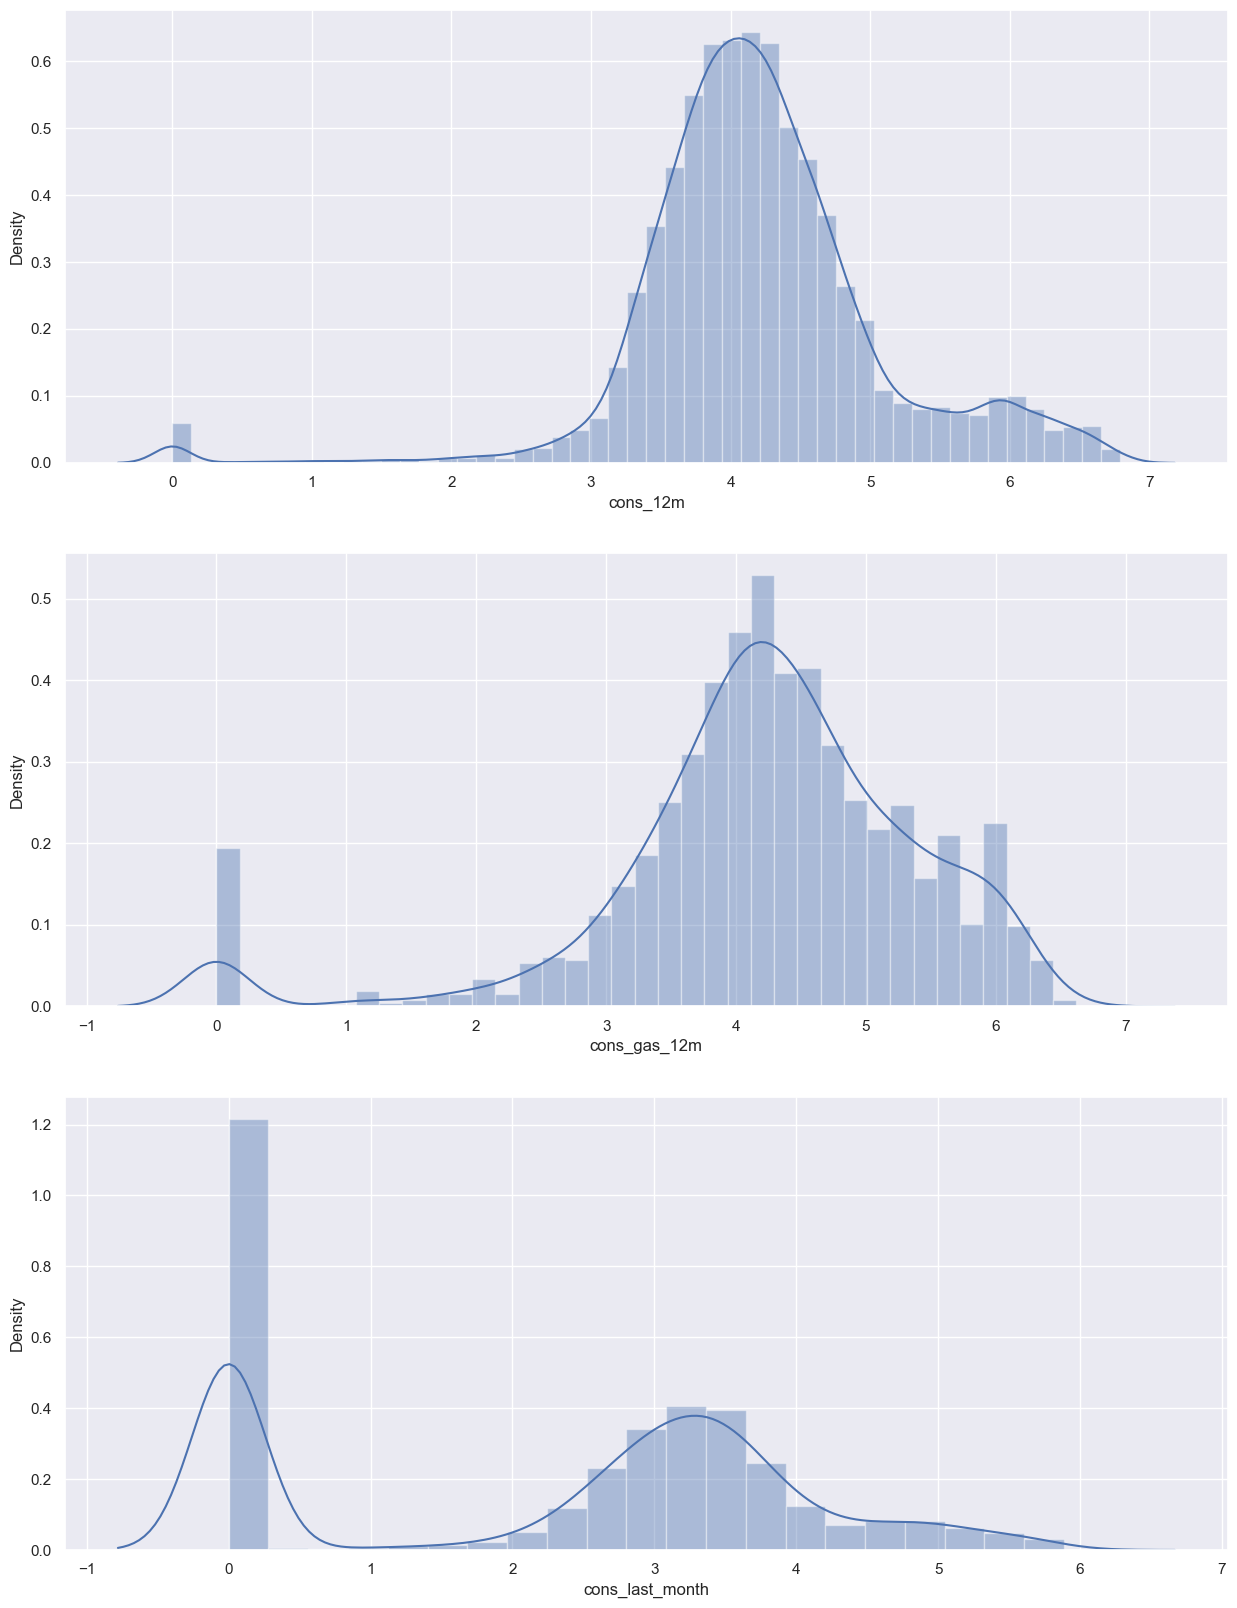

In [22]:
# Checking the distributions and plotting histogram

fig, axs = plt.subplots(nrows=3, figsize=(15, 20))
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

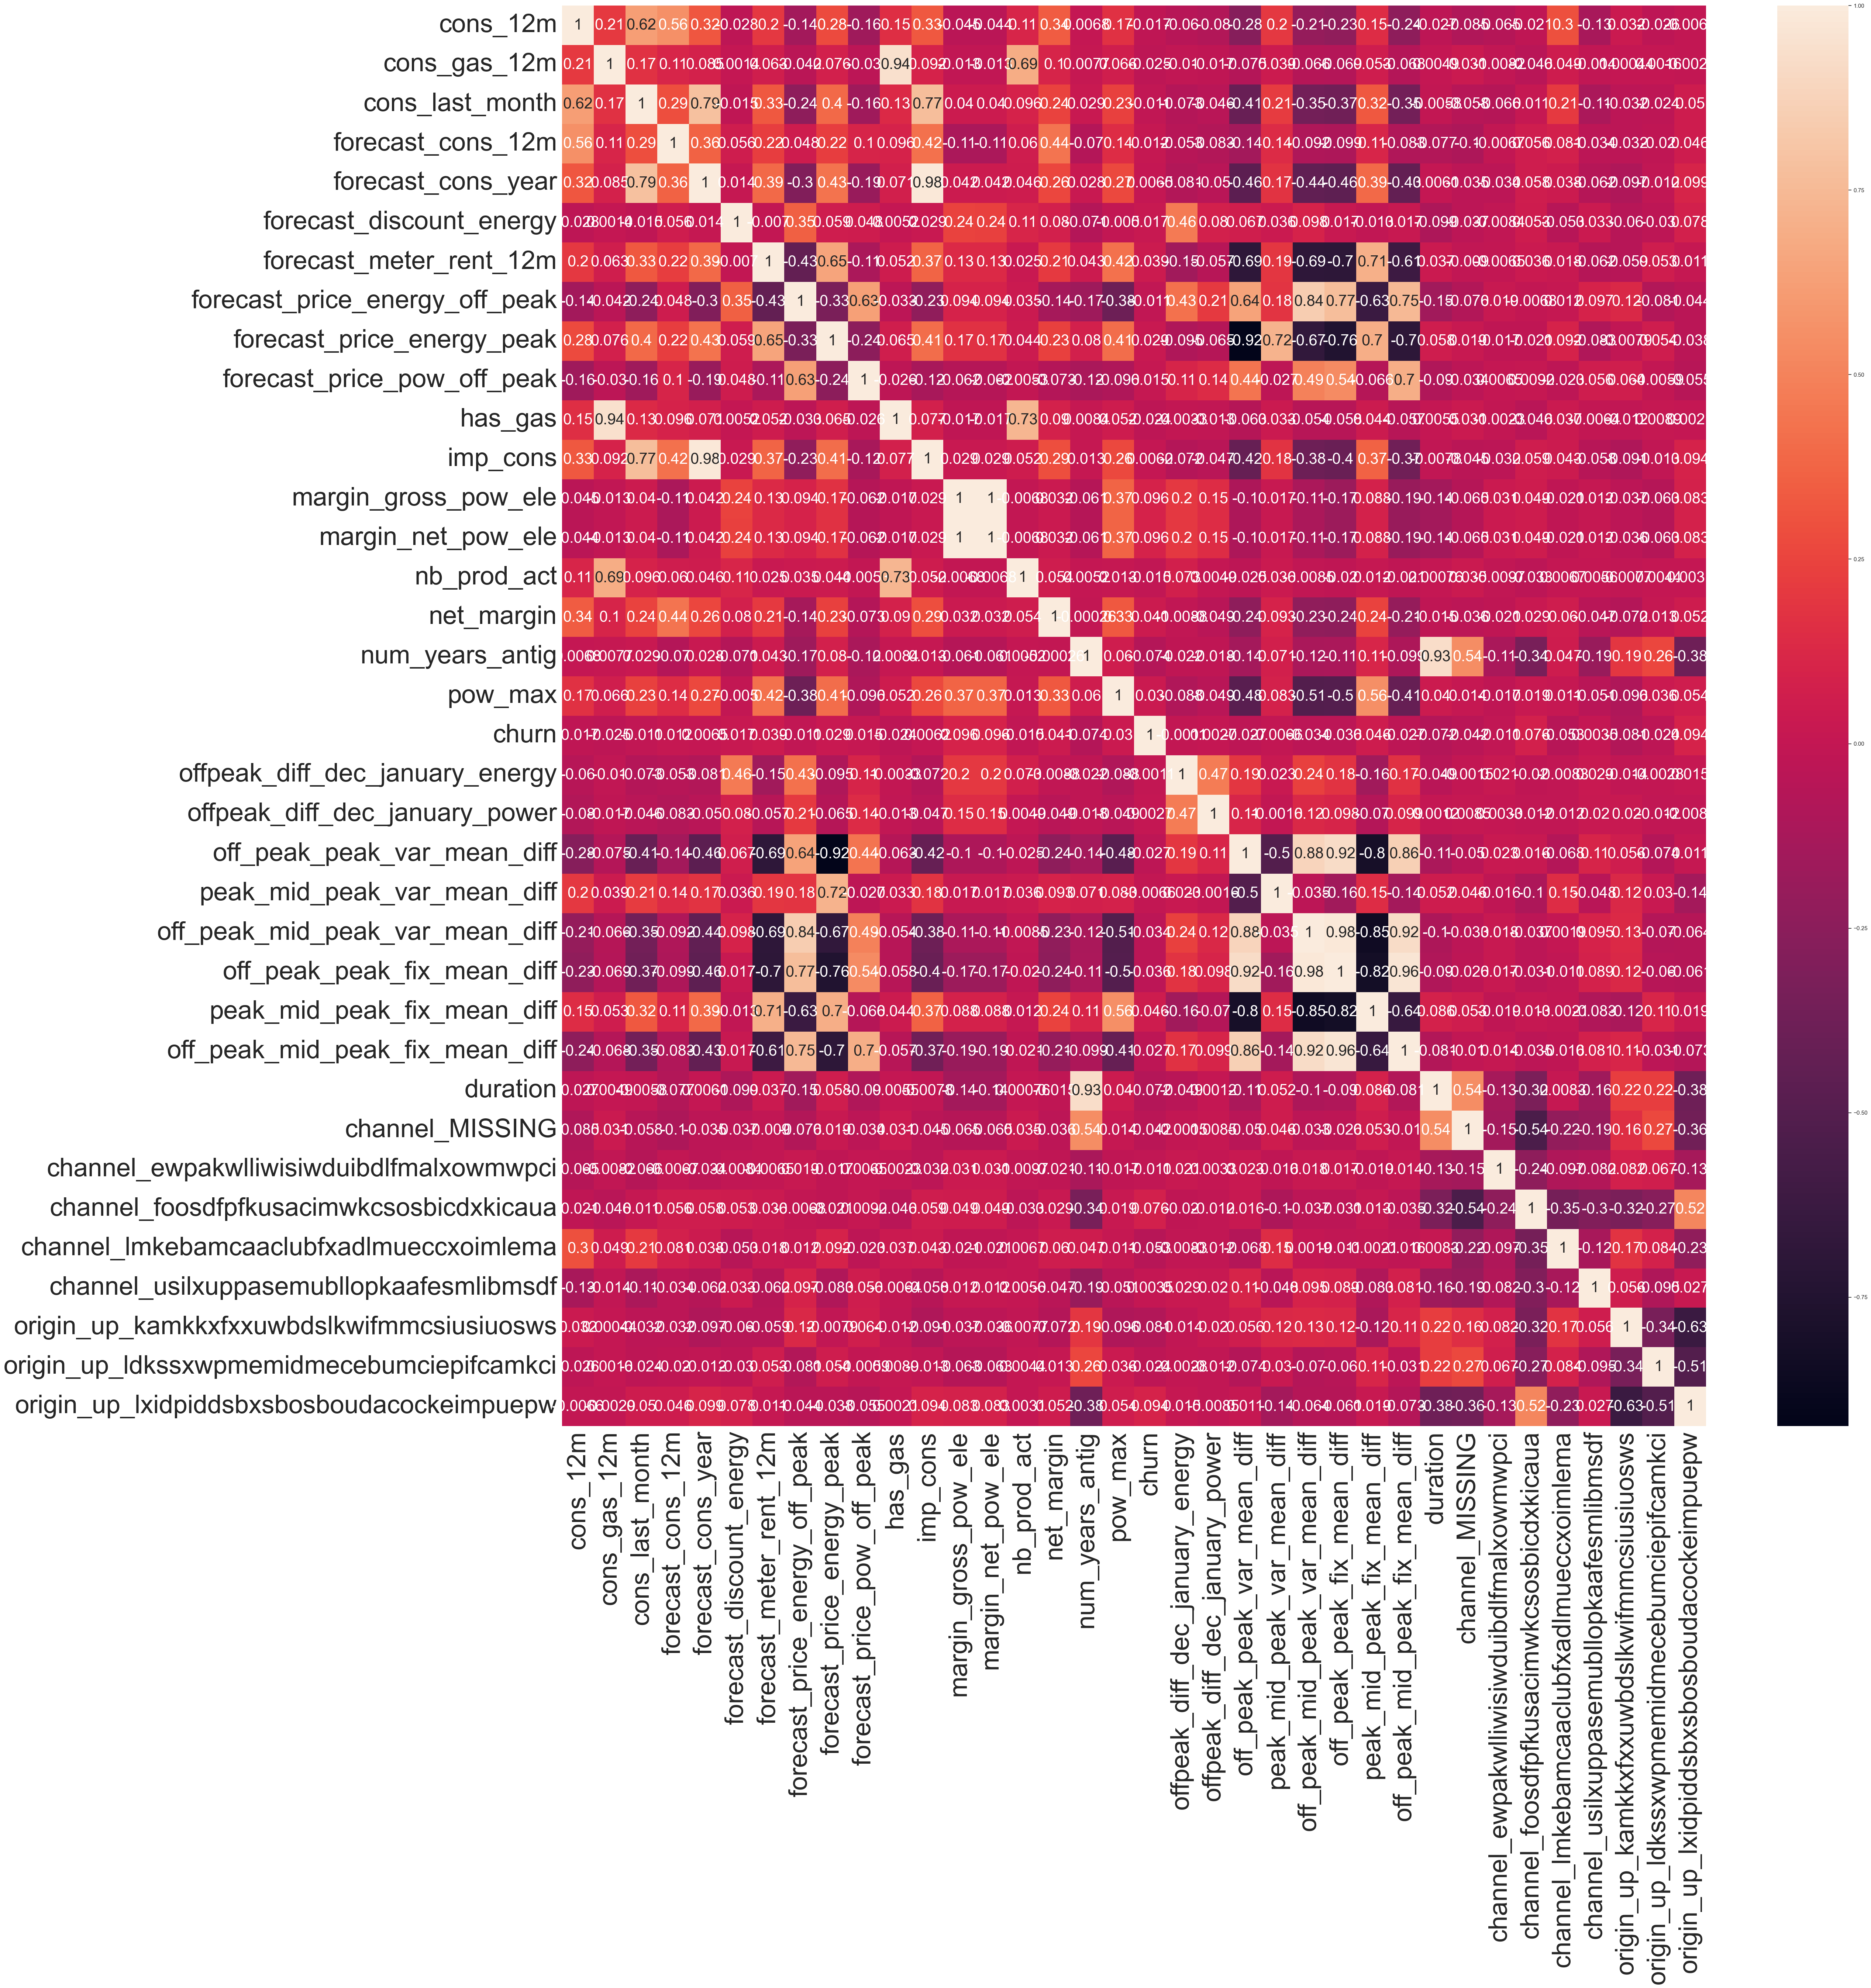

In [23]:
# Setting features that have 0 correlation with all of the independent variables and a high correlation with the 
# target variable (churn).

correlation = df.corr()

plt.figure(figsize=(50, 50))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 30})

# Axis ticks size
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.show()

Remove variables which exhibit a high correlation with other independent features.

Using correlation of 0.9 and above will result in removing cons_gas_12m, forecast_cons_year, num_years_antig, off_peak_mid_peak_var_mean_diff, and off_peak_mid_peak_fix_mean_diff

In [24]:
df = df.drop(columns=['cons_gas_12m', 'forecast_cons_year', 'num_years_antig', 
                      'off_peak_mid_peak_var_mean_diff', 'off_peak_mid_peak_fix_mean_diff'])
df.head()

id  cons_12m  cons_last_month date_activ  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000         0.000000 2013-06-15   
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479         0.000000 2009-08-21   
2  764c75f661154dac3a6c254cd082ea7d  2.736397         0.000000 2010-04-16   
3  bba03439a292a1e166f80264c16191cb  3.200029         0.000000 2010-03-30   
4  149d57cf92fc41cf94415803a877cb4b  3.646011         2.721811 2010-01-13   

    date_end date_modif_prod date_renewal  forecast_cons_12m  \
0 2016-06-15      2015-11-01   2015-06-23           0.000000   
1 2016-08-30      2009-08-21   2015-08-31           2.280920   
2 2016-04-16      2010-04-16   2015-04-17           1.689841   
3 2016-03-30      2010-03-30   2015-03-31           2.382089   
4 2016-03-07      2010-01-13   2015-03-09           2.650065   

   forecast_discount_energy  forecast_meter_rent_12m  ...  \
0                       0.0                 0.444045  ...   
1                       0.0                 1.237292  ...   
2                       0.0                 1.599009  ...   
3                       0.0                 1.318689  ...   
4                       0.0                 2.122969  ...   

   peak_mid_peak_fix_mean_diff  duration  channel_MISSING  \
0                     7.450670         3                0   
1                     0.000000         7                1   
2                     0.000000         6                0   
3                     0.000000         6                0   
4                     8.137629         6                1   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 36 columns]

In [25]:
# Training Predictive model
# Using Random Forest classifier

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Advantages:
Random Forest improves the diversity of the ensemble and also introduces randomness in the selection of features at each split of the decision trees.
Random Forest Classifier can handle both continuous and categorical variables as it is robust to noisy data and outliers

Disadvantage:
It can be prone to overfitting if the number of trees or the depth of the trees is too large

In [26]:
# Splitting dataset into training and test sample

# Using a copy of dataset for training sample

df_training = df.copy()

In [27]:
# Separating target variable from independent variable

y = df['churn']
X = df.drop(columns=['id', 'churn', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal'])
print(X.shape)
print(y.shape)

(14606, 30)
(14606,)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 30)
(10954,)
(3652, 30)
(3652,)


In [29]:
# model training
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [30]:
# evaluating how well the trained model is able to predict the values of the test datase
predictions = rfc.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [31]:
y_test.value_counts()

0    3286
1     366
Name: churn, dtype: int64

This showed that 3286 customers did not churn while 366 churn

In [32]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 13
False positives: 1
True negatives: 3285
False negatives: 353

Accuracy: 0.9030668127053669
Precision: 0.9285714285714286
Recall: 0.03551912568306011


Only 14 churn showed as True Positive out of 366 actual, which is poor.

1 False Positive: predicted to churn whereas did not churn

3285 True Negatives out of actual 3286 which is a good prediction

352 False Negatives is poor. This should be zero, hence model improvement is needed.

The Recall number is poor hence more predictive features are needed in feature engineering

In [33]:
# Using Feature Importance to check the number of times each feature is used for splitting across all trees

feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': rfc.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


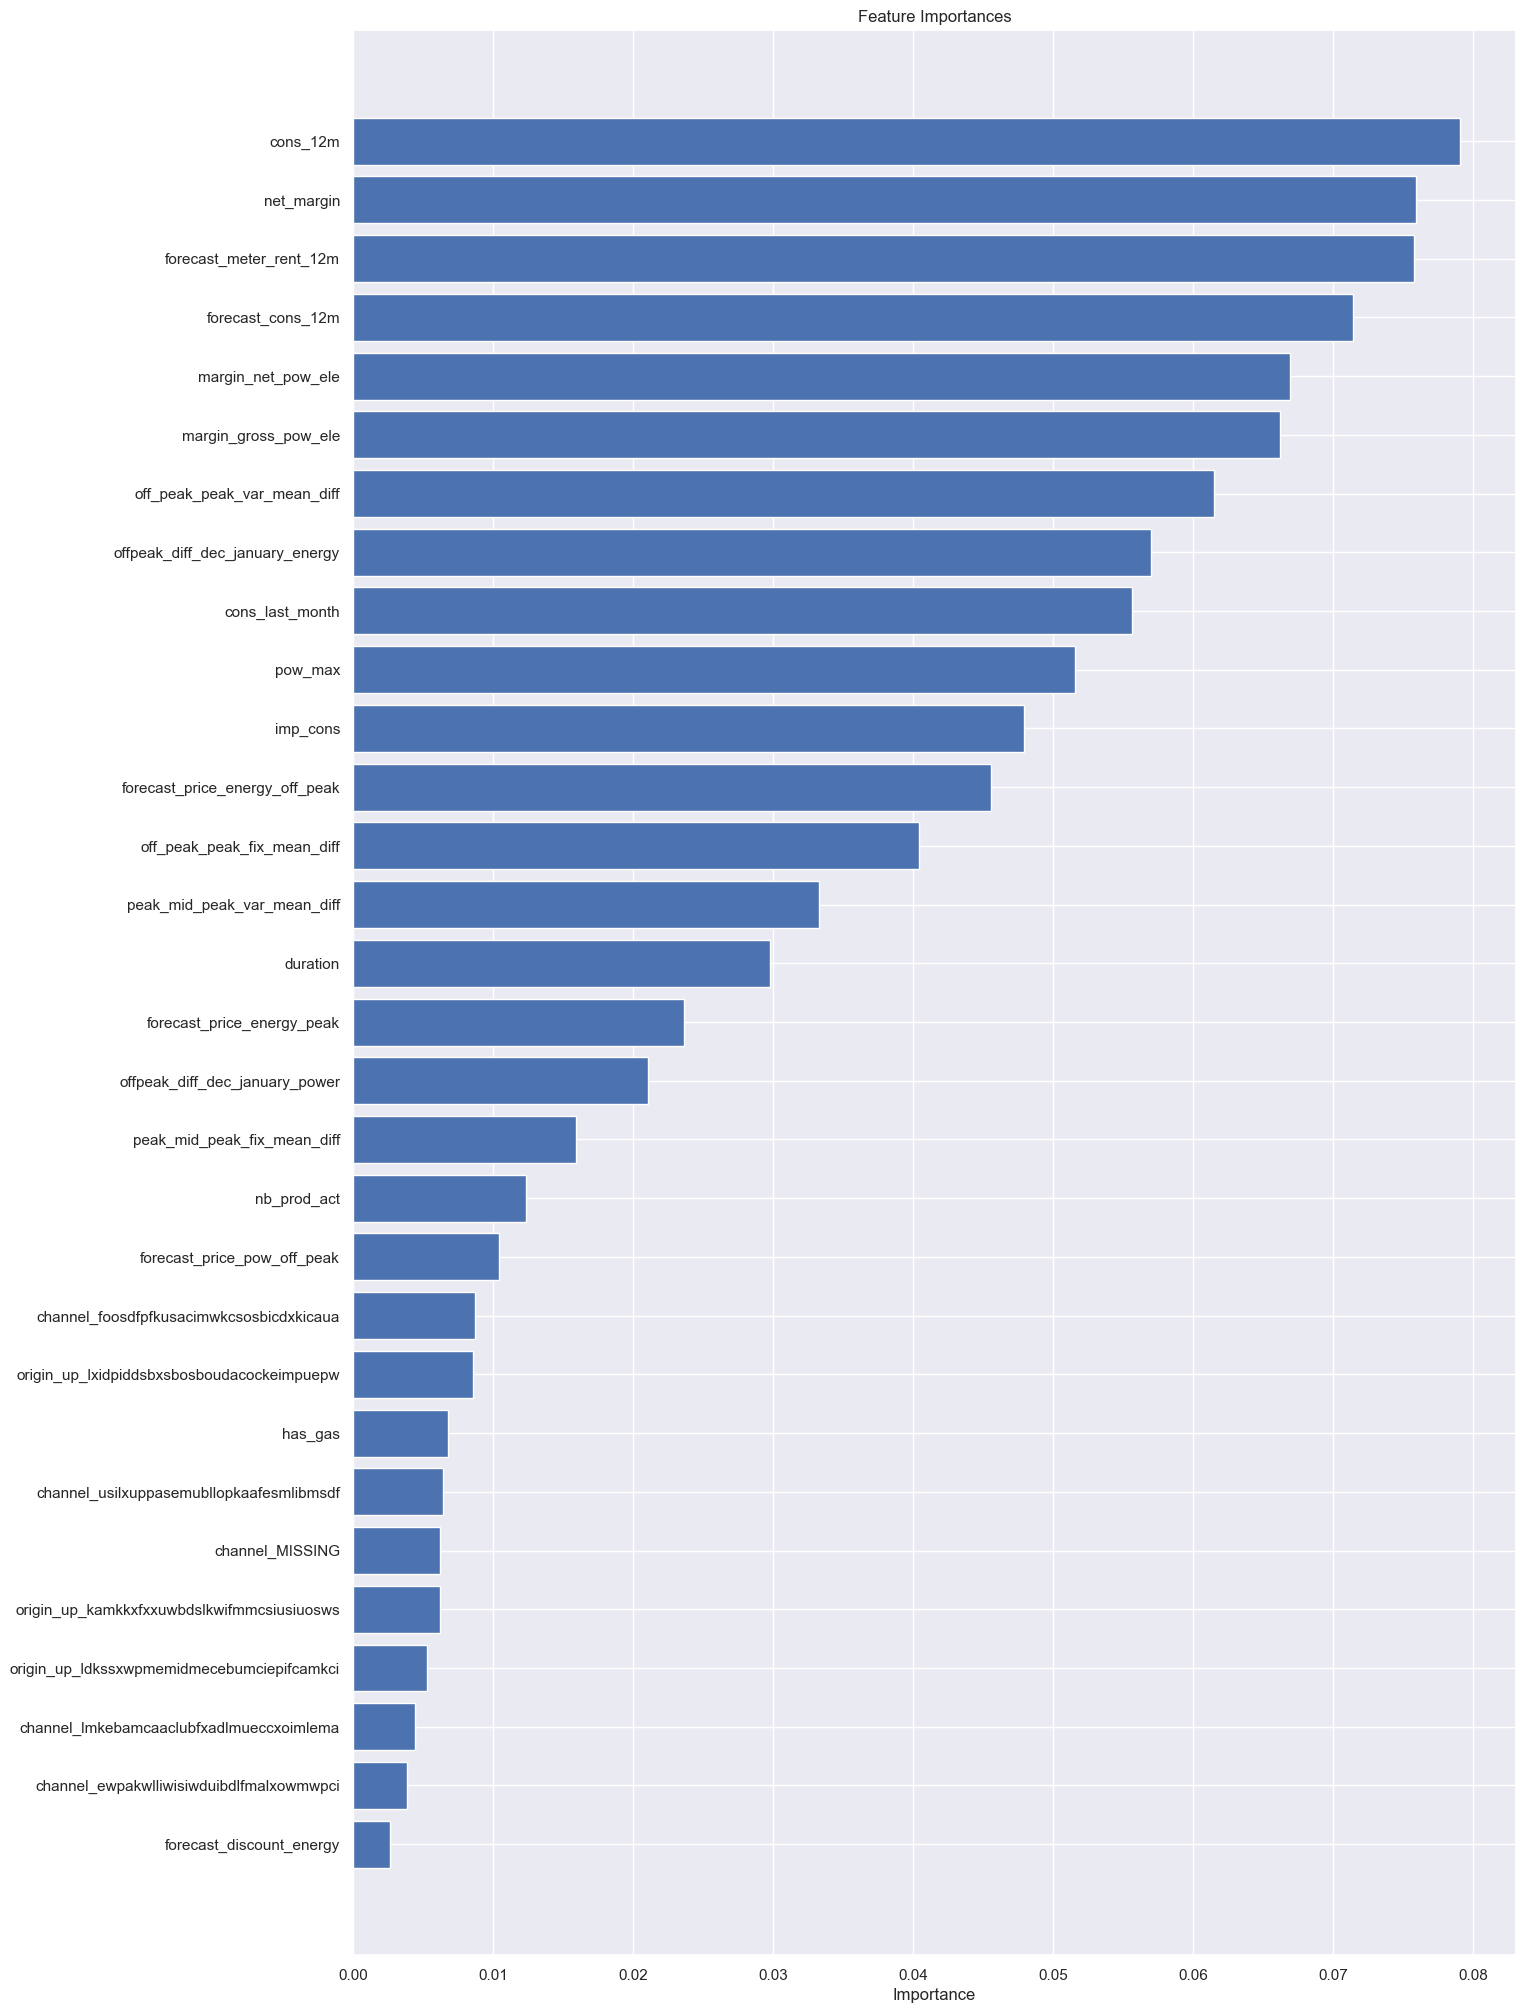

In [34]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

Consumption over 12 months is a top driver for churn in this model.

Net margin is also a top driver for churn

Price sensitivity are not the main driver for churn (though scattered).